In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('./mpg.csv')
print(mpg.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [3]:
print(mpg.shape)

(234, 11)


In [4]:
print(mpg.info())
print(mpg.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB
None
            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643


In [5]:
print(mpg.describe(include='all')) #요약된 것이 아닌 전부다 출력

       manufacturer        model       displ         year         cyl  \
count           234          234  234.000000   234.000000  234.000000   
unique           15           38         NaN          NaN         NaN   
top           dodge  caravan 2wd         NaN          NaN         NaN   
freq             37           11         NaN          NaN         NaN   
mean            NaN          NaN    3.471795  2003.500000    5.888889   
std             NaN          NaN    1.291959     4.509646    1.611534   
min             NaN          NaN    1.600000  1999.000000    4.000000   
25%             NaN          NaN    2.400000  1999.000000    4.000000   
50%             NaN          NaN    3.300000  2003.500000    6.000000   
75%             NaN          NaN    4.600000  2008.000000    8.000000   
max             NaN          NaN    7.000000  2008.000000    8.000000   

           trans  drv         cty         hwy   fl category  
count        234  234  234.000000  234.000000  234      234  

In [6]:
#manufacturer를 보고 15개 종류가 있고 가장 많이 팔린 것은 37종이란 것을 알 수 있다.
#top을 보고 dodge가 가장 많이 판 것을 확인할 수 있다. 
#이와 같이 데이터의 특징을 파악할 수 있고 이 작업은 가장 먼저 해야한다. 
#함수와 메서드는 ()가 필요하지만 어트리뷰트는 ()가 필요없다 df.shape와 df.head()의 차이

#변수명 바꾸기 
#데이터를 처리하다보면 변수명이 이상하게 되어있는 경우가 많다.
#이런 경우 변수이름을 바꿔줘서 알아보기 편하게 만들 수 있다.
#df.rename()을 사용해서 변수이름을 바꿀 수 있다.

df_raw = pd.DataFrame({
    'var1':[1,2,3],
    'var2':[2,3,2]
})

print(df_raw)

   var1  var2
0     1     2
1     2     3
2     3     2


In [8]:
#var1과 var2가 뭘 뜻하는지 알기 어렵다. 
df_new = df_raw.copy() #데이터를 변형할 땐 꼭 복사를 해두고 하자
df_new = df_new.rename(columns={'var1':'v1'}) #column을 설정하고 딕셔너리 형태로 매핑해주면 변경된다.
print(df_new)

   v1  var2
0   1     2
1   2     3
2   3     2


In [10]:
#mpg데이터에서 cty는 도시 연비, hwy는 고속도로 연비를 뜻한다. 쉽게 바꿔보자
mpg_new = mpg.copy()
mpg_new = mpg_new.rename(columns={'cty':'city','hwy':'highway'})
print(mpg_new.columns) #잘 바뀐것을 확인할 수 있다. 

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'city',
       'highway', 'fl', 'category'],
      dtype='object')


In [11]:
#데이터에 들어있는 변수만 사용해서 분석할 수 있지만, 변수를 조합하거나 함수를 이용해서 새 변수를 만들어 분석할 수 있다. 
df_new['sum'] = df_new['v1'] + df_new['var2']
print(df_new) #데이터 프레임은 위와 같이 브로드캐스트 연산이 가능하다.

   v1  var2  sum
0   1     2    3
1   2     3    5
2   3     2    5


In [12]:
df_new['mean'] = df_new['sum']/2
print(df_new)

   v1  var2  sum  mean
0   1     2    3   1.5
1   2     3    5   2.5
2   3     2    5   2.5


In [14]:
#mpg로 통합 연비 변수 만들기
mpg_new['total'] = (mpg_new['city'] + mpg_new['highway'])/2
print(mpg_new['total'])
#통합연비의 평균 구하기
print(mpg_new['total'].mean())

0      23.5
1      25.0
2      25.5
3      25.5
4      21.0
       ... 
229    23.5
230    25.0
231    21.0
232    22.0
233    21.5
Name: total, Length: 234, dtype: float64
20.14957264957265


In [15]:
print(mpg_new['total'].describe())

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64


In [16]:
#일정 기준 이상만 빼서 파생 변수 만들기
def chk(x):
    if x > 20:
        x = '합격'
    else:
        x = '불합격'
    return x
mpg_new['good'] = mpg_new['total'].apply(lambda x: chk(x))
print(mpg_new)

    manufacturer   model  displ  year  cyl       trans drv  city  highway fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f    18       29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f    21       29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f    20       31  p   
3           audi      a4    2.0  2008    4    auto(av)   f    21       30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f    16       26  p   
..           ...     ...    ...   ...  ...         ...  ..   ...      ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f    19       28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f    21       29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f    16       26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f    18       26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f    17       26  p   

    category  total good  
0    compact

In [17]:
#혹은 numpy를 사용하면 다음과 같이 사용할 수 있다.
import numpy as np

mpg_new['test'] = np.where(mpg_new['total']>20, 'pass', 'fail') #혹은 np.where(조건문, 참일때, 거짓일 때)를 사용할 수 있다.
print(mpg_new)

    manufacturer   model  displ  year  cyl       trans drv  city  highway fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f    18       29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f    21       29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f    20       31  p   
3           audi      a4    2.0  2008    4    auto(av)   f    21       30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f    16       26  p   
..           ...     ...    ...   ...  ...         ...  ..   ...      ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f    19       28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f    21       29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f    16       26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f    18       26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f    17       26  p   

    category  total good  test  
0    c

In [18]:
print(mpg_new['good'].value_counts()) #약 반반으로 나뉜 것을 확인할 수 있다.

합격     123
불합격    111
Name: good, dtype: int64


<AxesSubplot:>

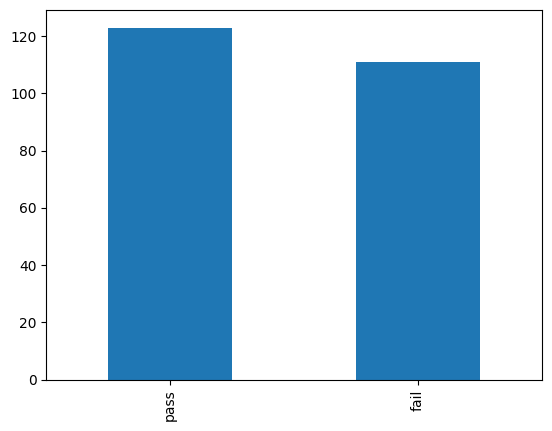

In [19]:
#막대그래프로 시각화하기
count_test = mpg_new['test'].value_counts()
count_test.plot.bar()

In [21]:
#np.where은 중첩으로 사용해서 여러가지 범주를 처리할 수 있다.
mpg_new['new_test'] = np.where(mpg_new['total']>30,'A',np.where(mpg_new['total']>20,'B','C'))

print(mpg_new['new_test'])
print(mpg_new['new_test'].value_counts())

0      B
1      B
2      B
3      B
4      B
      ..
229    B
230    B
231    B
232    B
233    B
Name: new_test, Length: 234, dtype: object
B    115
C    111
A      8
Name: new_test, dtype: int64


In [22]:
#또는 np.where에서 여러 조건을 사용할 때 isin을 사용할 수 있다.
mpg_new['size'] = np.where(mpg_new['category'].isin(['compact','subcompact','2seater']),'small','large')

print(mpg_new['size'])

0      small
1      small
2      small
3      small
4      small
       ...  
229    large
230    large
231    large
232    large
233    large
Name: size, Length: 234, dtype: object


In [23]:
#실습 midwest.csv를 사용한다.
#1. 데이터의 특징을 파악한다.
#2. poptotal 변수를 total로, popasian 변수를 asian으로 수정한다.
#3. total, asian 변수를 사용해서 전체 인구 대비 아시아 인구 백분율 파생변수를 추가하고 히스토그램을 만들어 분포를 살핀다.
#4. 아시아 인구 백분율 전체 평균을 구하고 평균을 초과하면 large, 외에는 small인 파생변수를 만든다.
#5. large와 small에 해당하는 지역이 얼마나 많은지 빈도표와 빈도막대그래프를 만들어 확인한다.

In [24]:
mid = pd.read_csv('./midwest.csv')
print(mid.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [25]:
print(mid.describe(include='all'))

                PID  county state        area      poptotal    popdensity  \
count    437.000000     437   437  437.000000  4.370000e+02    437.000000   
unique          NaN     320     5         NaN           NaN           NaN   
top             NaN  MONROE    IL         NaN           NaN           NaN   
freq            NaN       5   102         NaN           NaN           NaN   
mean    1437.338673     NaN   NaN    0.033169  9.613030e+04   3097.742985   
std      876.390266     NaN   NaN    0.014679  2.981705e+05   7664.751786   
min      561.000000     NaN   NaN    0.005000  1.701000e+03     85.050000   
25%      670.000000     NaN   NaN    0.024000  1.884000e+04    622.407407   
50%     1221.000000     NaN   NaN    0.030000  3.532400e+04   1156.208330   
75%     2059.000000     NaN   NaN    0.038000  7.565100e+04   2330.000000   
max     3052.000000     NaN   NaN    0.110000  5.105067e+06  88018.396600   

            popwhite      popblack  popamerindian       popasian  ...  \
co

In [27]:
new_mid = mid.copy()
new_mid = new_mid.rename(columns={'poptotal':'total','popasian':'asian'})
print(new_mid.head())


   PID     county state   area  total   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052  66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014  10626   759.000000      7054      3496   
2  563       BOND    IL  0.022  14991   681.409091     14477       429   
3  564      BOONE    IL  0.017  30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018   5836   324.222222      5264       547   

   popamerindian  asian  ...  percollege  percprof  poppovertyknown  \
0             98    249  ...   19.631392  4.355859            63628   
1             19     48  ...   11.243308  2.870315            10529   
2             35     16  ...   17.033819  4.488572            14235   
3             46    150  ...   17.278954  4.197800            30337   
4             14      5  ...   14.475999  3.367680             4815   

   percpovertyknown  percbelowpoverty  percchildbelowpovert  percadultpoverty  \
0         96.274777         13.151443          

0      0.376759
1      0.451722
2      0.106731
3      0.486918
4      0.085675
         ...   
432    0.885746
433    0.199549
434    0.221821
435    1.231471
436    0.980912
Name: asian100, Length: 437, dtype: float64


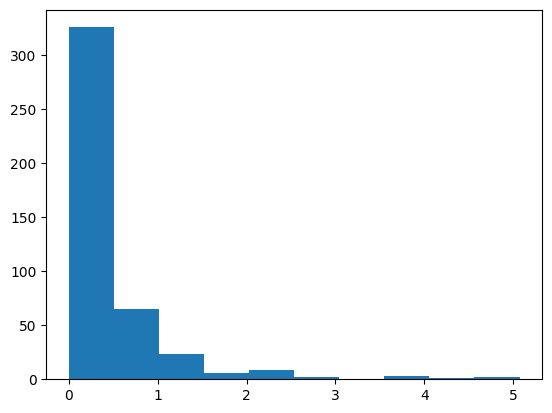

In [30]:
new_mid['asian100'] = (new_mid['asian']/new_mid['total'])*100
print(new_mid['asian100'])
import matplotlib.pyplot as plt
plt.hist(new_mid['asian100'])
plt.show()

In [32]:
asian_mean = new_mid['asian100'].mean()
print(asian_mean) #아시아 백분율 평균
new_mid['asian_check'] = np.where(new_mid['asian100']>asian_mean,'large','small')
print(new_mid['asian_check'])
print(new_mid['asian_check'].value_counts())

0.4872461834357345
0      small
1      small
2      small
3      small
4      small
       ...  
432    large
433    small
434    small
435    large
436    large
Name: asian_check, Length: 437, dtype: object
small    318
large    119
Name: asian_check, dtype: int64


<BarContainer object of 2 artists>

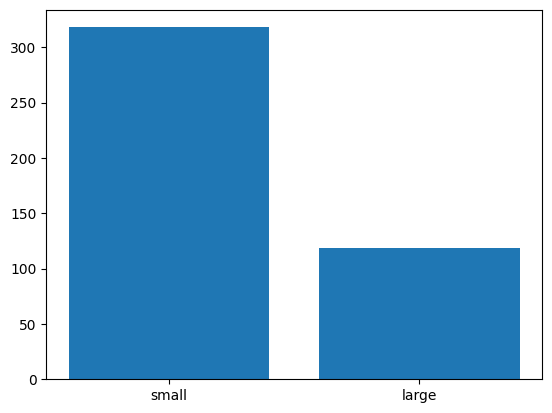

In [33]:
plt.bar(new_mid['asian_check'].unique(),new_mid['asian_check'].value_counts())